# Dataset 1

In [1]:
from helpers import *

## Setup

In [2]:
DATA_ROOT_PATH = r"D:\master_thesis_wd\datasets\dataset1"
os.chdir(DATA_ROOT_PATH)
logging.basicConfig(level=logging.INFO,filename='dataset1.log', filemode='w', format='%(asctime)s - %(message)s', datefmt='%d-%b-%y %H:%M:%S')

IMAGES_PATH = r"./images"
RAW_LABELS_PATH = r"./raw_labels"
YOLO_LABELS_PATH = r"./yolo_labels"
if not os.path.exists(YOLO_LABELS_PATH):
    os.mkdir(YOLO_LABELS_PATH)

## EDA Dataset 

### Images preview

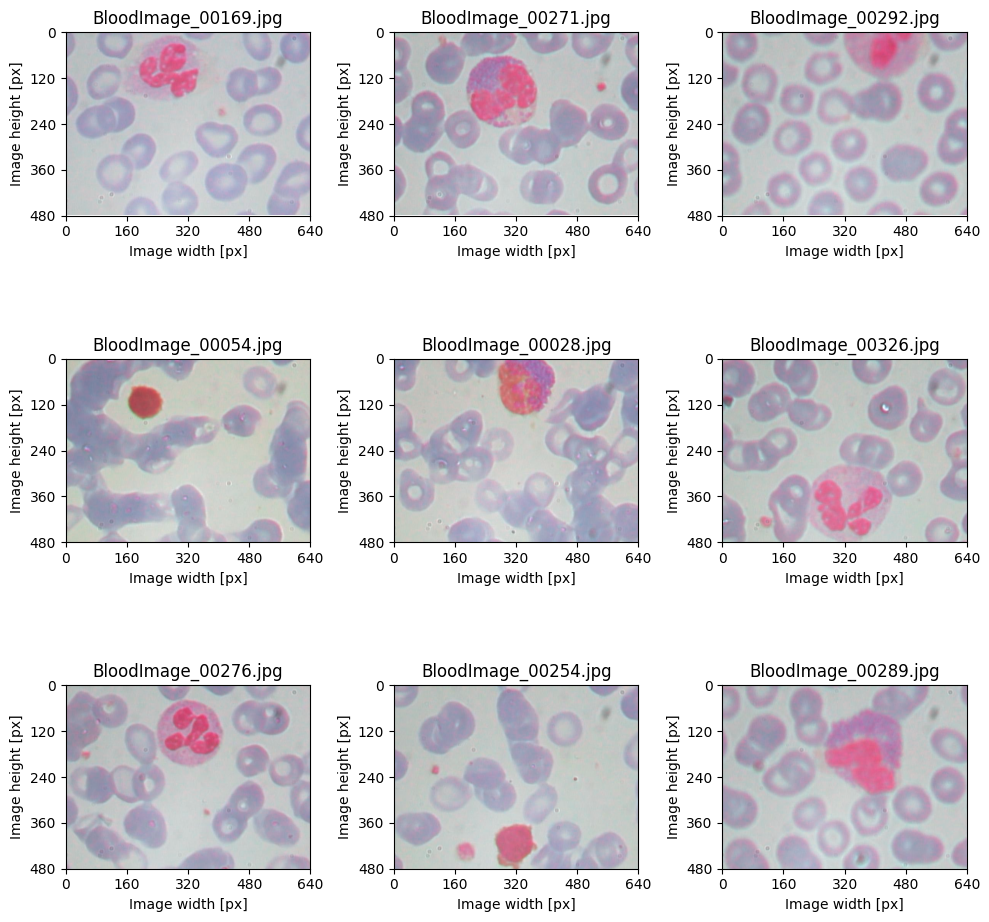

In [3]:
show_raw_images(IMAGES_PATH)

### Images insights 

In [4]:
all_images = [load_image(os.path.join(IMAGES_PATH, path)) for path in os.listdir(IMAGES_PATH)]
all_labels = [load_image(os.path.join(RAW_LABELS_PATH, path)) for path in os.listdir(RAW_LABELS_PATH)]

In [5]:
print("Number of images:", len(all_images))

Number of images: 364


In [6]:
print("Number of label files:", len(all_images))

Number of label files: 364


In [7]:
get_folder_size(IMAGES_PATH)

Dataset size: 7 [MB]


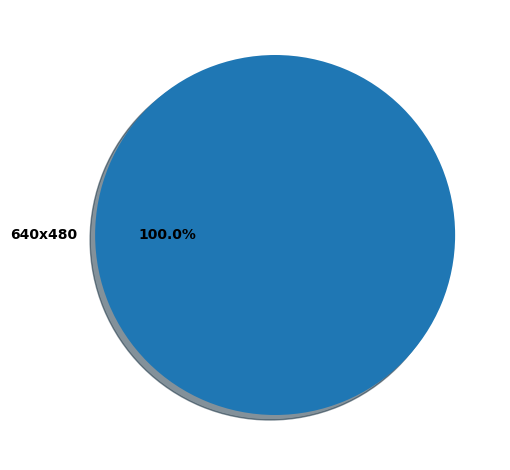

In [8]:
images_shape = list(map(lambda x: f"{x.shape[1]}x{x.shape[0]}", all_images))
pie_chart_from_list(images_shape)

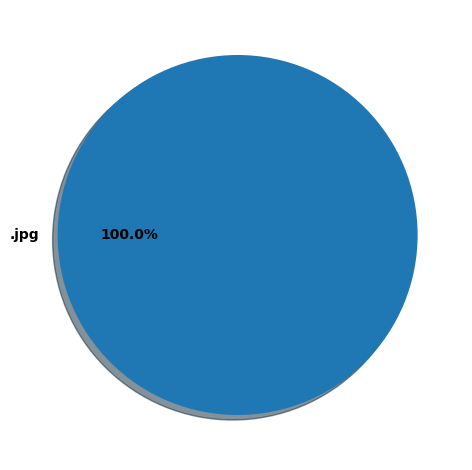

In [9]:
images_extension = list(map(lambda x: os.path.splitext(x)[1], os.listdir(IMAGES_PATH)))
pie_chart_from_list(images_extension)

### Raw labels insights

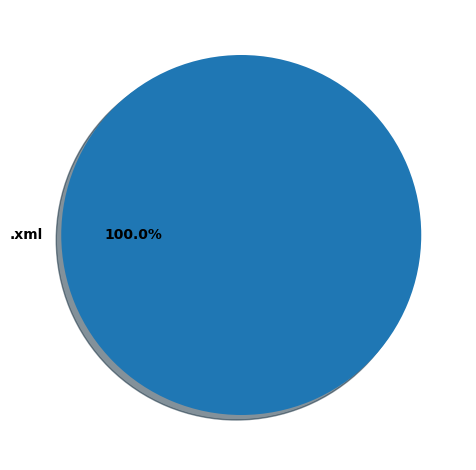

In [10]:
labels_extension = list(map(lambda x: os.path.splitext(x)[1], os.listdir(RAW_LABELS_PATH)))
pie_chart_from_list(labels_extension)

In [11]:
!tree raw_labels /F /A

Folder PATH listing for volume Dysk lokalny
Volume serial number is 00000092 58D8:E3FB
D:\MASTER_THESIS_WD\DATASETS\DATASET1\RAW_LABELS
    BloodImage_00000.xml
    BloodImage_00001.xml
    BloodImage_00002.xml
    BloodImage_00003.xml
    BloodImage_00004.xml
    BloodImage_00005.xml
    BloodImage_00006.xml
    BloodImage_00007.xml
    BloodImage_00008.xml
    BloodImage_00009.xml
    BloodImage_00010.xml
    BloodImage_00011.xml
    BloodImage_00012.xml
    BloodImage_00013.xml
    BloodImage_00014.xml
    BloodImage_00015.xml
    BloodImage_00016.xml
    BloodImage_00017.xml
    BloodImage_00018.xml
    BloodImage_00019.xml
    BloodImage_00020.xml
    BloodImage_00021.xml
    BloodImage_00022.xml
    BloodImage_00023.xml
    BloodImage_00024.xml
    BloodImage_00026.xml
    BloodImage_00028.xml
    BloodImage_00029.xml
    BloodImage_00030.xml
    BloodImage_00031.xml
    BloodImage_00032.xml
    BloodImage_00033.xml
    BloodImage_00034.xml
    BloodImage_00035.xml
    BloodImage

In [12]:
with open(os.path.join(RAW_LABELS_PATH, "BloodImage_00000.xml")) as f:
    print(f.read())

<annotation>
	<folder>JPEGImages</folder>
	<filename>BloodImage_00000.jpg</filename>
	<path>/home/pi/detection_dataset/JPEGImages/BloodImage_00000.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>640</width>
		<height>480</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>WBC</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>260</xmin>
			<ymin>177</ymin>
			<xmax>491</xmax>
			<ymax>376</ymax>
		</bndbox>
	</object>
	<object>
		<name>RBC</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>78</xmin>
			<ymin>336</ymin>
			<xmax>184</xmax>
			<ymax>435</ymax>
		</bndbox>
	</object>
	<object>
		<name>RBC</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>63</xmin>
			<ymin>237</ymin>
			<xmax>169</xmax>
			<ymax>336</ymax>
		</bndbox>
	</object>
	<object>
		<n

In [13]:
import pandas as pd
from bs4 import BeautifulSoup

def parse_xml_labels_to_df(path: str) -> pd.DataFrame:
    """
    Parse annotations stored in XML files.

    Args:
        - path (str): Path to the directory where XML annotation files are stored.

    Returns:
        pd.DataFrame: DataFrame containing parsed information from the XML files.
    """
    df = pd.DataFrame(
        columns=[
            "img_name",
            "label",
            "x1",
            "y1",
            "x2",
            "y2",
            "img_width",
            "img_height",
        ]
    )
    for xml_file_name in os.listdir(path):
        xml_file_path = os.path.join(path, xml_file_name)
        with open(xml_file_path, 'r') as xml:
            xml_data = xml.read()
            xml_data_handler = BeautifulSoup(xml_data, "xml")
            for object in xml_data_handler.find_all('object'):
                if object.find('name').get_text() == "WBC":
                    row = {}
                    row["img_name"] = os.path.splitext(xml_file_name)[0]
                    row["label"] = 0
                    row["img_width"] = 640
                    row["img_height"] = 480
                    row["x1"] = int(object.find("xmin").get_text())
                    row["y1"] = int(object.find("ymin").get_text())
                    row["x2"] = int(object.find("xmax").get_text())
                    row["y2"] = int(object.find("ymax").get_text())
                    df_record = pd.DataFrame(row, index=[0])
                    df = pd.concat([df, df_record]).reset_index(drop=True)
    return df

In [14]:
raw_labels = parse_xml_labels_to_df(RAW_LABELS_PATH)
raw_labels.head()

img_name label   x1   y1   x2   y2 img_width img_height
0  BloodImage_00000     0  260  177  491  376       640        480
1  BloodImage_00001     0   68  315  286  480       640        480
2  BloodImage_00002     0  283    1  567  106       640        480
3  BloodImage_00003     0  127   40  344  226       640        480
4  BloodImage_00004     0  109  134  324  321       640        480

In [15]:
raw_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   img_name    372 non-null    object
 1   label       372 non-null    object
 2   x1          372 non-null    object
 3   y1          372 non-null    object
 4   x2          372 non-null    object
 5   y2          372 non-null    object
 6   img_width   372 non-null    object
 7   img_height  372 non-null    object
dtypes: object(8)
memory usage: 23.4+ KB


### Is amount of image label match image amount ?

In [16]:
len(all_images) == raw_labels.shape[0]

False

### WHY FALSE ?

In [17]:
raw_labels[raw_labels.duplicated()]

Empty DataFrame
Columns: [img_name, label, x1, y1, x2, y2, img_width, img_height]
Index: []

In [18]:
raw_labels[raw_labels["img_name"].duplicated()]

img_name label   x1   y1   x2   y2 img_width img_height
11   BloodImage_00010     0  239  253  510  470       640        480
31   BloodImage_00031     0  287  364  437  480       640        480
35   BloodImage_00034     0  310  351  458  480       640        480
45   BloodImage_00043     0  498  304  639  480       640        480
47   BloodImage_00044     0    1   40  121  154       640        480
66   BloodImage_00065     0  404  107  538  224       640        480
72   BloodImage_00070     0  375  348  471  439       640        480
110  BloodImage_00113     0  257  430  288  457       640        480
157  BloodImage_00176     0  306  102  460  246       640        480
170  BloodImage_00193     0  418  382  640  479       640        480
172  BloodImage_00195     0  555   89  640  213       640        480
224  BloodImage_00249     0  164   20  362  205       640        480
286  BloodImage_00313     0  180  215  404  457       640        480
340  BloodImage_00374     0    1  125  216  377       640        480

In [19]:
raw_labels.query('img_name == "BloodImage_00010"')

img_name label   x1   y1   x2   y2 img_width img_height
10  BloodImage_00010     0   23  229  204  421       640        480
11  BloodImage_00010     0  239  253  510  470       640        480

**INFO** The fact that we have more image label records than images is because one image can contain more than one WBC cell
 

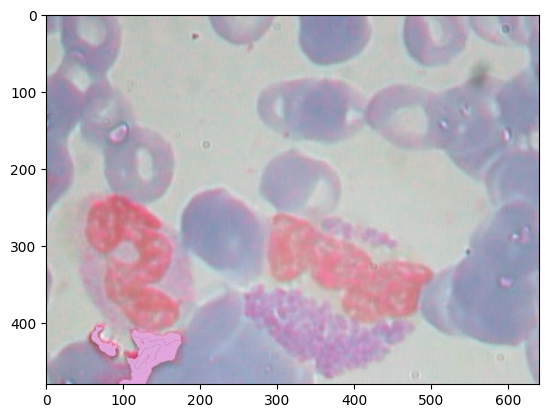

In [20]:
plt.imshow(load_image(os.path.join(IMAGES_PATH, "BloodImage_00010.jpg")))

## Parse raw label format to YOLO label format

In [21]:
yolo_labels = transform_labels_to_yolo_format(raw_labels)
yolo_labels.head()

img_name label  x_center  y_center     width    height
0  BloodImage_00000     0  0.586719  0.576042  0.360938  0.414583
1  BloodImage_00001     0  0.276562  0.828125  0.340625   0.34375
2  BloodImage_00002     0  0.664062  0.111458   0.44375   0.21875
3  BloodImage_00003     0  0.367969  0.277083  0.339062    0.3875
4  BloodImage_00004     0  0.338281  0.473958  0.335938  0.389583

In [22]:
yolo_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_name  372 non-null    object
 1   label     372 non-null    object
 2   x_center  372 non-null    object
 3   y_center  372 non-null    object
 4   width     372 non-null    object
 5   height    372 non-null    object
dtypes: object(6)
memory usage: 17.6+ KB


### Save yolo labels inside dataset

In [23]:
save_yolo_labels(yolo_labels, YOLO_LABELS_PATH)

100%|█████████████████████████████████████████████████████████████████████████████| 358/358 [00:00<00:00, 15045.70it/s]


# Preview of images from dataset1 with labels

In [24]:
label_map = {"0": "wbc"}

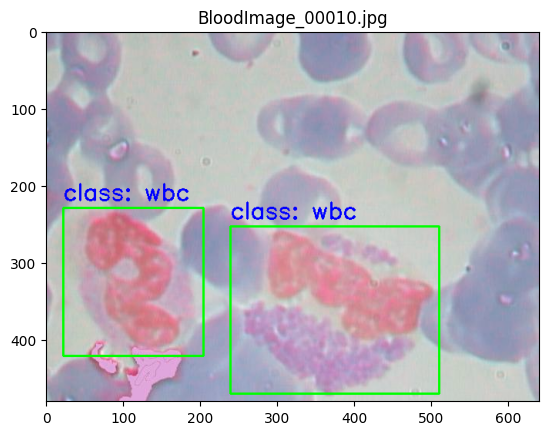

In [25]:
img_path = os.path.join(IMAGES_PATH, "BloodImage_00010.jpg")
label_path = os.path.join(YOLO_LABELS_PATH, "BloodImage_00010.txt")
show_labeled_image(img_path, label_path, label_map)

### Check more examples

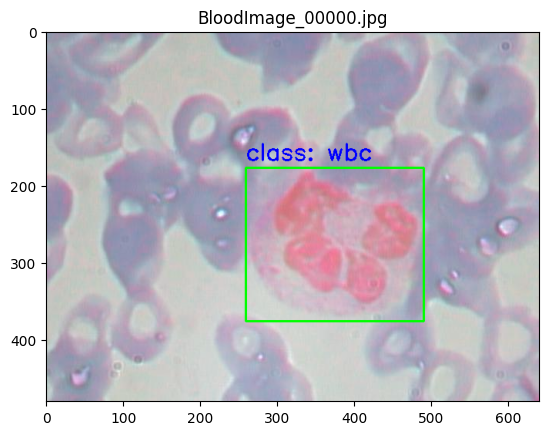

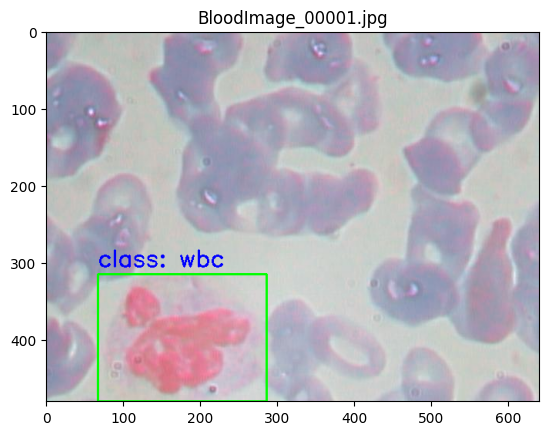

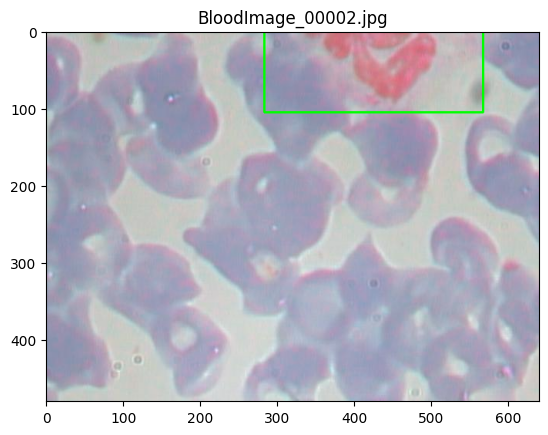

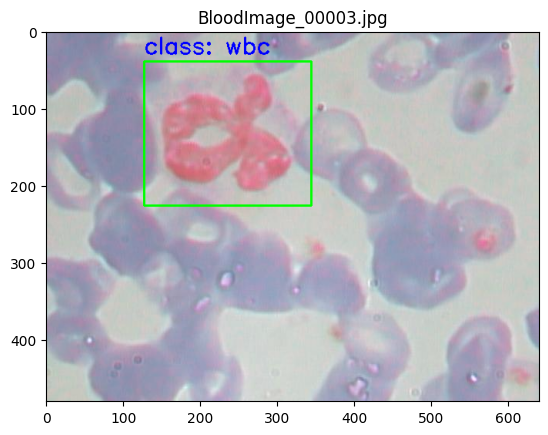

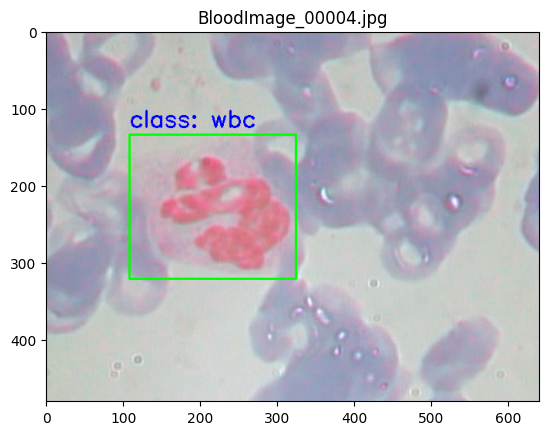

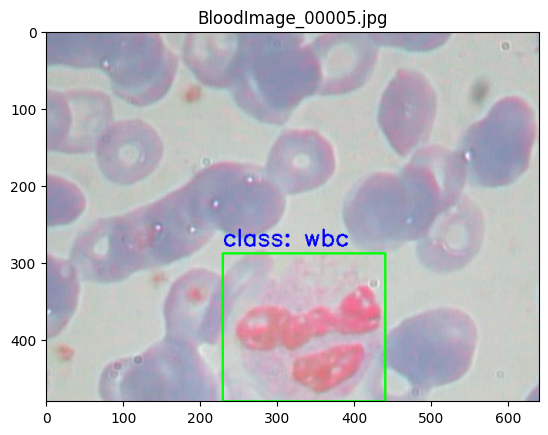

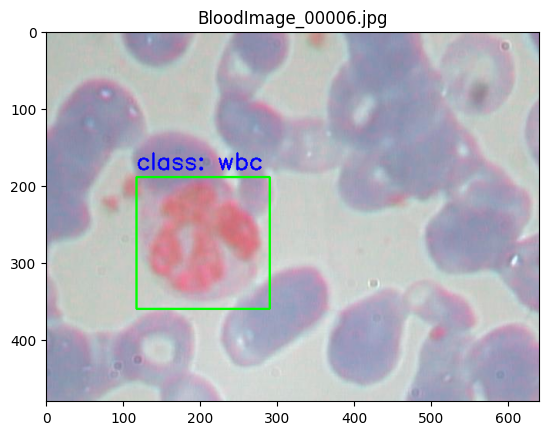

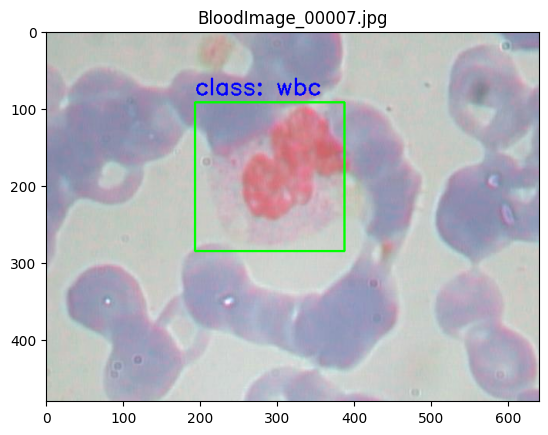

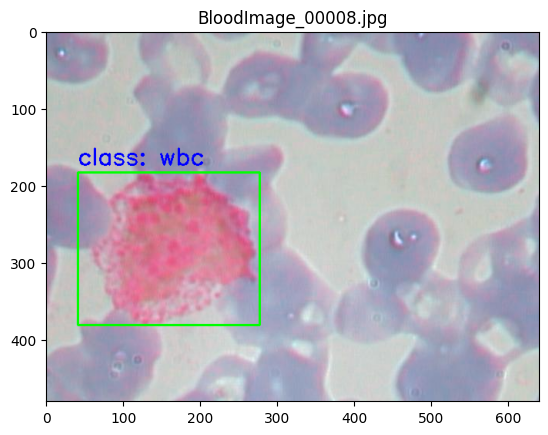

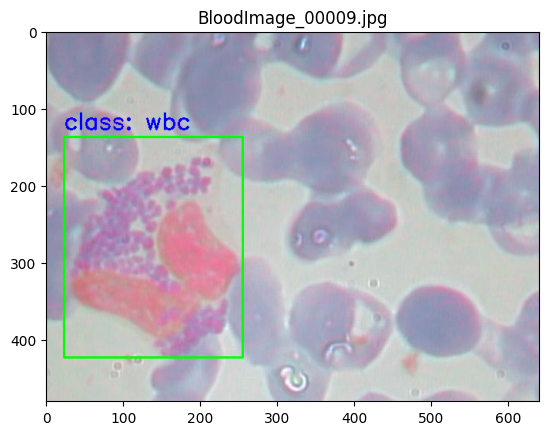

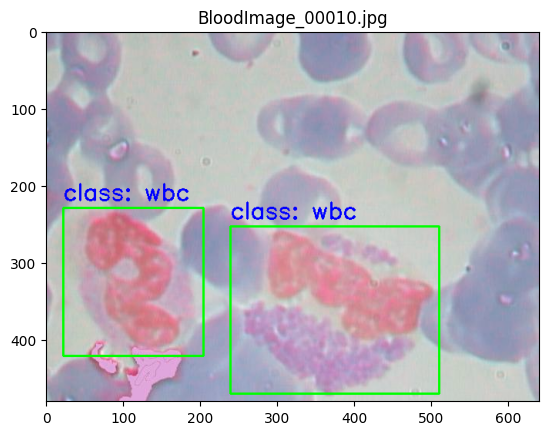

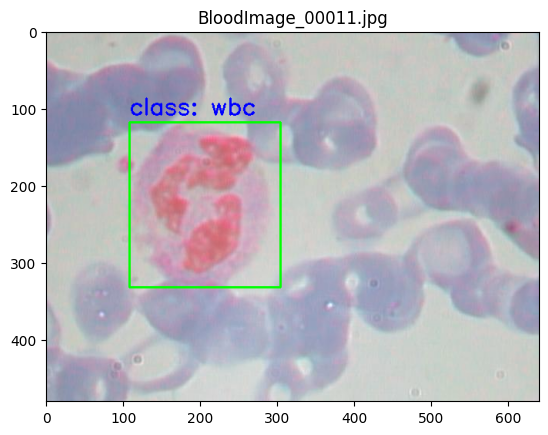

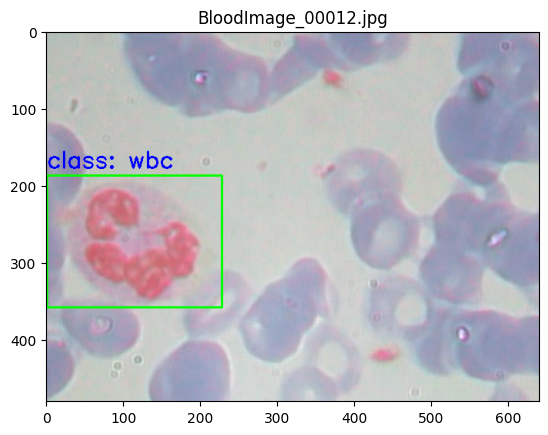

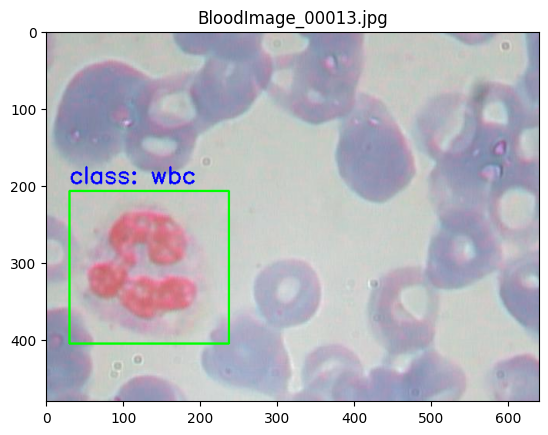

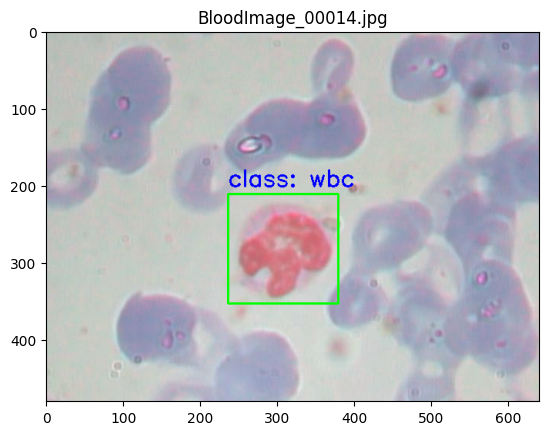

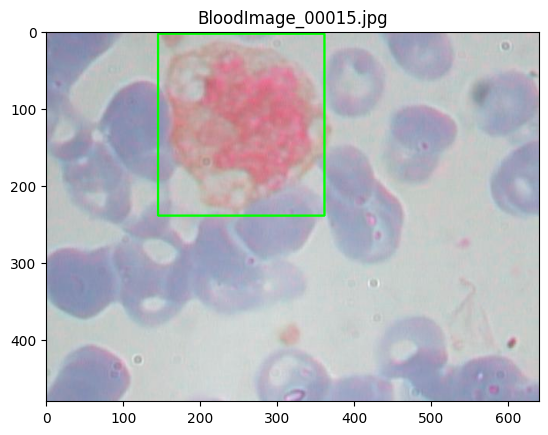

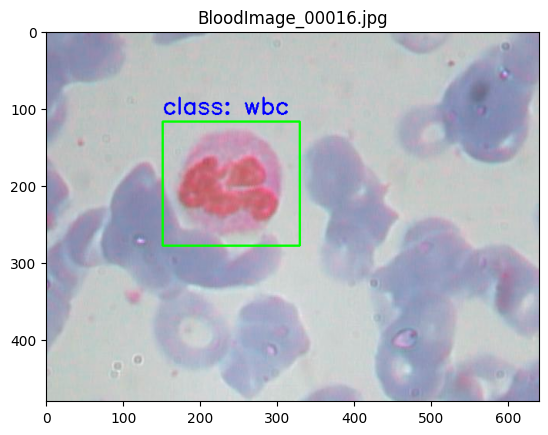

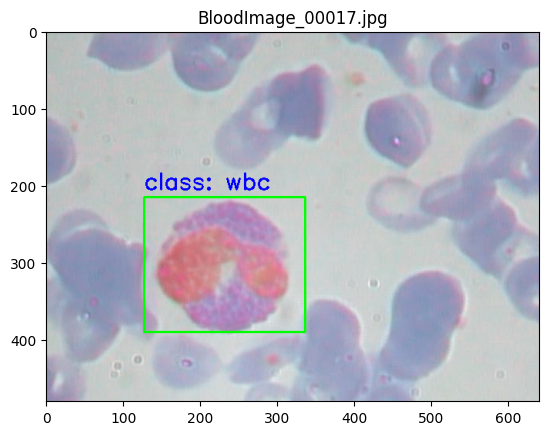

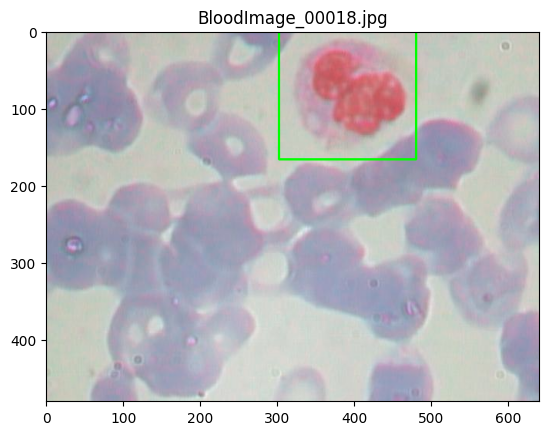

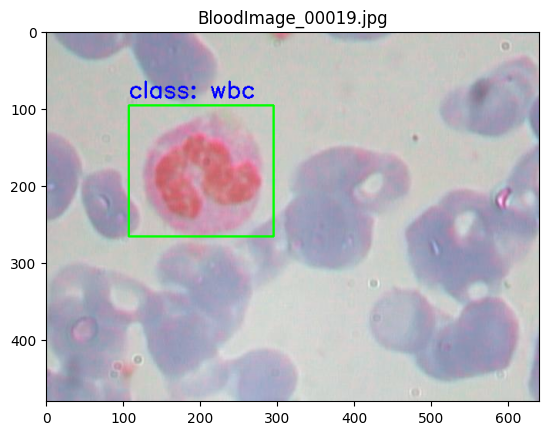

In [26]:
for image_file_name in os.listdir(IMAGES_PATH)[:20]:
    label_path = os.path.join(YOLO_LABELS_PATH, os.path.splitext(image_file_name)[0] + ".txt")
    if not os.path.exists(label_path):
        continue
    image_full_path = os.path.join(IMAGES_PATH, image_file_name)
    show_labeled_image(image_full_path, label_path, label_map)